### companion to threshold_count to visualize our data

In [1]:
library(ggplot2)
library(plyr)
library(reshape2)

In [12]:
#### A
test_A <- read.csv('~/Dropbox/sdworkin2016/genotype_A.csv')
#test_A <- read.csv('~/Dropbox/sdworkin2016/solute_A.csv')

test_A$pref_index <- as.numeric(as.character(test_A$pref_index))
pref_A <- data.frame('genotype' = 'ppk00582', 'pref' = test_A[!is.na(test_A$pref_index),]$pref_index, 'pixels' = test_A[!is.na(test_A$pref_index),]$total_pixels)

#### B
test_B <- read.csv('~/Dropbox/sdworkin2016/genotype_B.csv')
#test_B <- read.csv('~/Dropbox/sdworkin2016/solute_B.csv')

test_B$pref_index <- as.numeric(as.character(test_B$pref_index))
pref_B <- data.frame('genotype' = 'wtrw', 'pref' = test_B[!is.na(test_B$pref_index),]$pref_index, 'pixels' = test_B[!is.na(test_B$pref_index),]$total_pixels)

#### C
test_C <- read.csv('~/Dropbox/sdworkin2016/genotype_C.csv')
#test_C <- read.csv('~/Dropbox/sdworkin2016/solute_C.csv')

test_C$pref_index <- as.numeric(as.character(test_C$pref_index))
pref_C <- data.frame('genotype' = 'LVP', 'pref' = test_C[!is.na(test_C$pref_index),]$pref_index, 'pixels' = test_C[!is.na(test_C$pref_index),]$total_pixels)

#### D
test_D <- read.csv('~/Dropbox/sdworkin2016/genotype_D.csv')
test_D$pref_index <- as.numeric(as.character(test_D$pref_index))
pref_D <- data.frame('genotype' = 'ppk13647', 'pref' = test_D[!is.na(test_D$pref_index),]$pref_index, 'pixels' = test_D[!is.na(test_D$pref_index),]$total_pixels)

#### E
test_E <- read.csv('~/Dropbox/sdworkin2016/genotype_E.csv')
test_E$pref_index <- as.numeric(as.character(test_E$pref_index))
pref_E <- data.frame('genotype' = 'ppk14228', 'pref' = test_E[!is.na(test_E$pref_index),]$pref_index, 'pixels' = test_E[!is.na(test_E$pref_index),]$total_pixels)

#### F
test_F <- read.csv('~/Dropbox/sdworkin2016/genotype_F.csv')
test_F$pref_index <- as.numeric(as.character(test_F$pref_index))
pref_F <- data.frame('genotype' = 'LVP', 'pref' = test_F[!is.na(test_F$pref_index),]$pref_index, 'pixels' = test_F[!is.na(test_F$pref_index),]$total_pixels)

#### control
control <- read.csv('~/Dropbox/sdworkin2016/control.csv')
control$pref_index <- as.numeric(as.character(control$pref_index))
control <- data.frame('genotype' = 'LVP control', 'pref' = control[!is.na(control$pref_index),]$pref_index, 'pixels' = control[!is.na(control$pref_index),]$total_pixels)


all_preference <- rbind(pref_A,pref_B,pref_C,pref_D,pref_E,pref_F,control)
all_preference$genotype <- factor(all_preference$genotype, levels = c("LVP control","LVP","ppk13647","ppk14228","wtrw","ppk00582")) 
all_preference.filtered <- all_preference[all_preference$pixels > 150,]

preference_plot <- ggplot(data=all_preference,aes(x=genotype,y=pref)) + geom_point()
pixel_plot <- ggplot(data=all_preference,aes(x=genotype,y=pixels)) + geom_point()

preference_plot.filtered <- ggplot(data=all_preference.filtered,aes(x=genotype,y=pref)) + geom_point()
pixel_plot.filtered <- ggplot(data=all_preference.filtered,aes(x=genotype,y=pixels)) + geom_point()

preference_plot.filtered.jitter <- ggplot(data=all_preference.filtered,aes(x=genotype,y=pref,colour=pixels)) + geom_jitter(width=0.5,alpha=0.5)
preference_plot.filtered.violin <- ggplot(data=all_preference.filtered,aes(x=genotype,y=pref,colour=pixels)) + geom_violin() + geom_jitter(width=0.5,alpha=0.5)



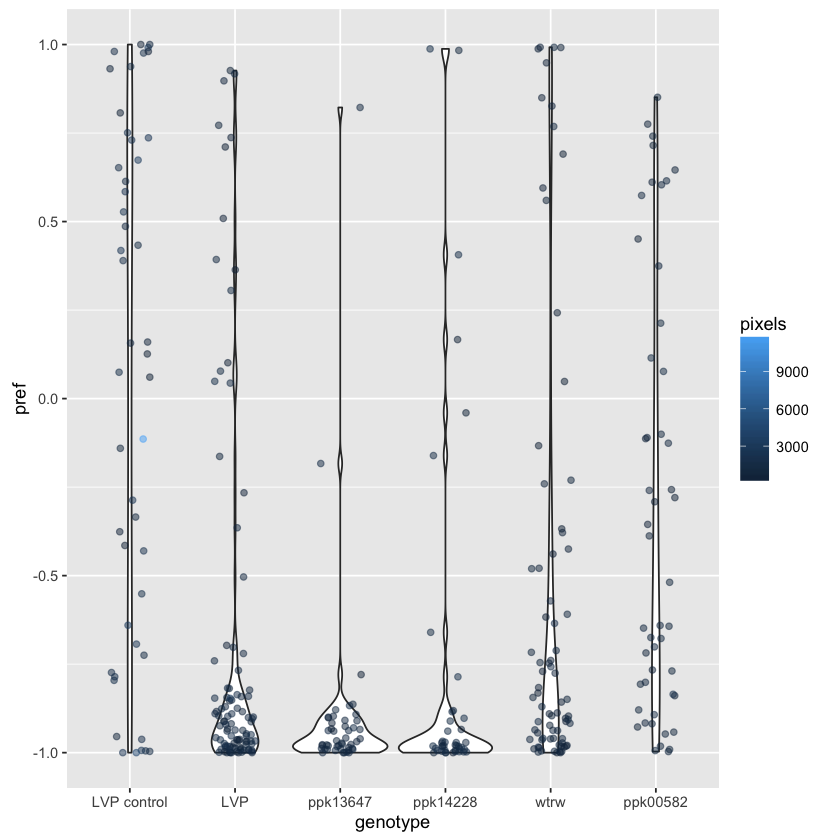

In [13]:
preference_plot.filtered.violin

In [4]:
### testing for ANOVA - *but* assumes normal distribution
aov(pref ~ genotype,data=all_preference.filtered) -> genotype_AOV
summary(genotype_AOV)
TukeyHSD(genotype_AOV)

             Df Sum Sq Mean Sq F value Pr(>F)    
genotype      5  29.52   5.905   18.75 <2e-16 ***
Residuals   355 111.82   0.315                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = pref ~ genotype, data = all_preference.filtered)

$genotype
                            diff         lwr         upr     p adj
LVP-LVP control      -0.75119975 -1.03559951 -0.46679999 0.0000000
ppk13647-LVP control -0.94458895 -1.27631956 -0.61285833 0.0000000
ppk14228-LVP control -0.81369616 -1.15515701 -0.47223531 0.0000000
wtrw-LVP control     -0.59361377 -0.89202580 -0.29520175 0.0000004
ppk00582-LVP control -0.36030810 -0.68863626 -0.03197994 0.0220954
ppk13647-LVP         -0.19338919 -0.47778895  0.09101056 0.3744851
ppk14228-LVP         -0.06249641 -0.35818803  0.23319521 0.9905980
wtrw-LVP              0.15758598 -0.08713377  0.40230573 0.4381260
ppk00582-LVP          0.39089165  0.11046804  0.67131526 0.0011056
ppk14228-ppk13647     0.13089278 -0.21056807  0.47235363 0.8818592
wtrw-ppk13647         0.35097517  0.05256315  0.64938720 0.0107219
ppk00582-ppk13647     0.58428084  0.25595

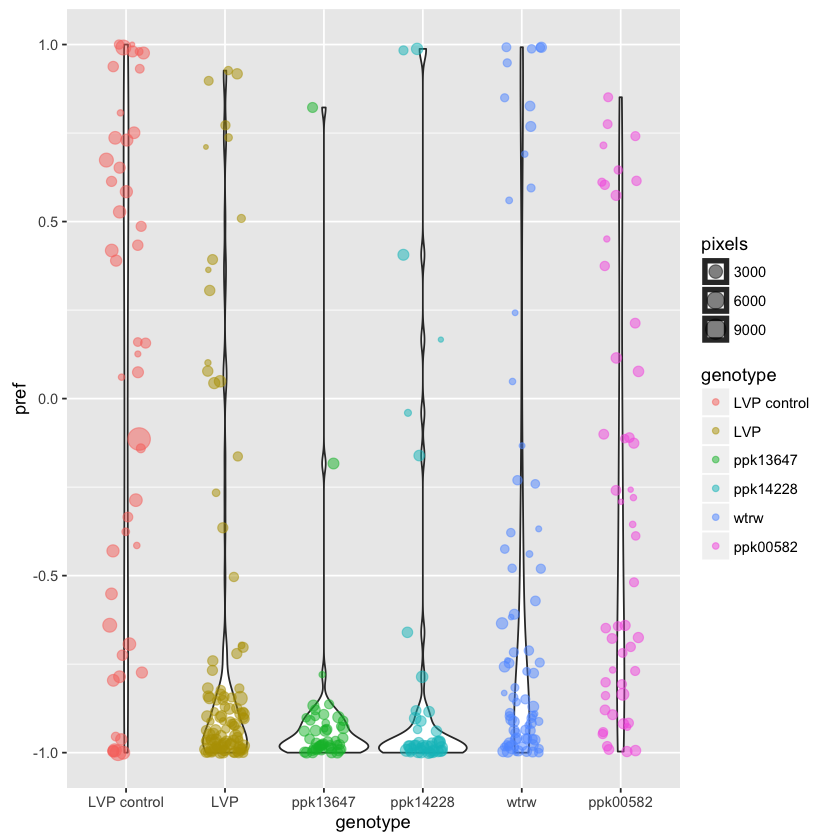

In [10]:
preference_plot.filtered.violin <- ggplot(data=all_preference.filtered,aes(size=pixels,x=genotype,y=pref)) + geom_violin() + geom_jitter(width=0.5,alpha=0.5,aes(colour=genotype))
preference_plot.filtered.violin

In [11]:
ggsave(filename = 'violin_dot_size.pdf',plot = preference_plot.filtered.violin,dpi = 300)

Saving 7 x 7 in image


In [12]:
pairwise.wilcox.test(all_preference.filtered$pref,g=all_preference.filtered$genotype,p.adjust.method = 'bon')

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”


	Pairwise comparisons using Wilcoxon rank sum test 

data:  all_preference.filtered$pref and all_preference.filtered$genotype 

         LVP control LVP     ppk13647 ppk14228 wtrw   
LVP      1.4e-07     -       -        -        -      
ppk13647 2.0e-08     0.11992 -        -        -      
ppk14228 2.6e-06     0.16140 1.00000  -        -      
wtrw     0.00058     0.23516 0.00020  0.00210  -      
ppk00582 0.32054     9.2e-06 9.3e-09  5.6e-06  0.06994

P value adjustment method: bonferroni 

In [8]:
write.csv(all_preference,'solomon_data.csv')

In [10]:
control <- read.csv('~/Dropbox/sdworkin2016/control.csv')
control$pref_index <- as.numeric(as.character(control$pref_index))

In [15]:
summary(control)

        genotype       pref              pixels     
 LVP control:55   Min.   :-1.00000   Min.   :    5  
                  1st Qu.:-0.63973   1st Qu.:  497  
                  Median : 0.07442   Median : 1597  
                  Mean   : 0.02282   Mean   : 1636  
                  3rd Qu.: 0.69396   3rd Qu.: 2196  
                  Max.   : 1.00000   Max.   :11806  

In [16]:
control.raw <- read.csv('~/Dropbox/sdworkin2016/control.csv')

summary(control.raw)


   egg_pixels                   filename     pref_index        total_pixels    
 Min.   :   0.00                    : 73   Min.   :-1.00000   Min.   :    0.0  
 1st Qu.:  25.75   20160825-1-a1.png:  1   1st Qu.:-0.63973   1st Qu.:    0.0  
 Median : 361.50   20160825-1-a2.png:  1   Median : 0.07442   Median :  192.5  
 Mean   : 803.32   20160825-1-a3.png:  1   Mean   : 0.02282   Mean   :  978.0  
 3rd Qu.:1220.25   20160825-1-a4.png:  1   3rd Qu.: 0.69396   3rd Qu.: 1679.0  
 Max.   :6577.00   20160825-1-b1.png:  1   Max.   : 1.00000   Max.   :11806.0  
 NA's   :73        (Other)          :107   NA's   :130        NA's   :93       

In [17]:
control.raw

egg_pixels,filename,pref_index,total_pixels
4002,20160825-1-a1.png,0.99154018,4019
17,20160825-1-a2.png,NA,NA
234,20160825-1-a3.png,0.80694981,259
25,20160825-1-a4.png,NA,NA
25,20160825-1-b1.png,NA,NA
2058,20160825-1-b2.png,0.97599616,2083
295,20160825-1-b3.png,NA,NA
1892,20160825-1-b4.png,0.73022405,2187
371,20160825-1-c1.png,-0.33452915,1115
744,20160825-1-c2.png,NA,NA
